In [1]:
from raspecio import basic
from multiprocessing import Process
import matplotlib.pyplot as plt

In [2]:
def led_blink_GPIO12():
    for i in range(100):
        basic.blink(pin_id=12, on_time=(100-i)*100, off_time=i*100, n_cycles=4, unit="usec")
    for i in range(100):
        basic.blink(pin_id=12, on_time=i*100, off_time=(100-i)*100, n_cycles=4, unit="usec")
    for i in range(100):
        basic.blink(pin_id=12, on_time=(100-i)*100, off_time=i*100, n_cycles=2, unit="usec")

In [3]:
def led_blink_GPIO13():
    for i in range(100):
        basic.blink(pin_id=13, on_time=(100-i)*100, off_time=i*100, n_cycles=10, unit="usec")

In [4]:
t1=Process(target=led_blink_GPIO12)
t2=Process(target=led_blink_GPIO13)
t1.start()
t2.start()
t1.join()
t2.join()

In [5]:
from raspecio import adc

In [6]:
module = adc.MCP3204(spi_num=0)

In [31]:
a = module.read_continuous(100, 200)
a

Time(sec),CH1,CH2,CH3,CH4
f64,f64,f64,f64,f64
0.0,2934.0,0.0,2476.0,3365.0
0.0,2911.0,0.0,3073.0,3289.0
0.0,2930.0,0.0,3209.0,3321.0
0.0,2917.0,0.0,3587.0,3209.0
0.0,2917.0,0.0,3959.0,3241.0
…,…,…,…,…
0.0,2909.0,0.0,2810.0,3587.0
0.0,2921.0,0.0,476.0,3587.0
0.0,2932.0,0.0,216.0,3619.0


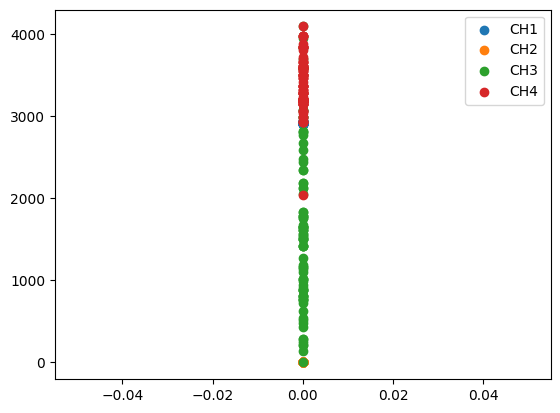

In [32]:
plt.scatter(a["Time(sec)"], a["CH1"], label="CH1")
plt.scatter(a["Time(sec)"], a["CH2"], label="CH2")
plt.scatter(a["Time(sec)"], a["CH3"], label="CH3")
plt.scatter(a["Time(sec)"], a["CH4"], label="CH4")
plt.legend()